Dataset with the missing values in Feature_1: 
    Feature_1  Feature_2  Target
83        NaN  -1.359041       0
53        NaN  -2.154699       0
70        NaN   1.656893       1
45        NaN   0.363953       1
44        NaN  -1.764086       0
39        NaN  -1.405301       0
22        NaN  -1.366994       0
80        NaN   1.692033       1
10        NaN  -2.233955       0
0         NaN  -1.757178       0

Count of the missing values per column: 
Feature_1    10
Feature_2     0
Target        0
dtype: int64

After Treating the missing values per column: 
Feature_1    0
Feature_2    0
Target       0
dtype: int64


The accuracy: 1.0

The Confusion Matrix: 
[[18  0]
 [ 0 15]]

The Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg     

C:\Users\LabStudent\AppData\Local\Temp\ipykernel_7068\1677285361.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Feature_1'].fillna(df['Feature_1'].mean(), inplace = True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


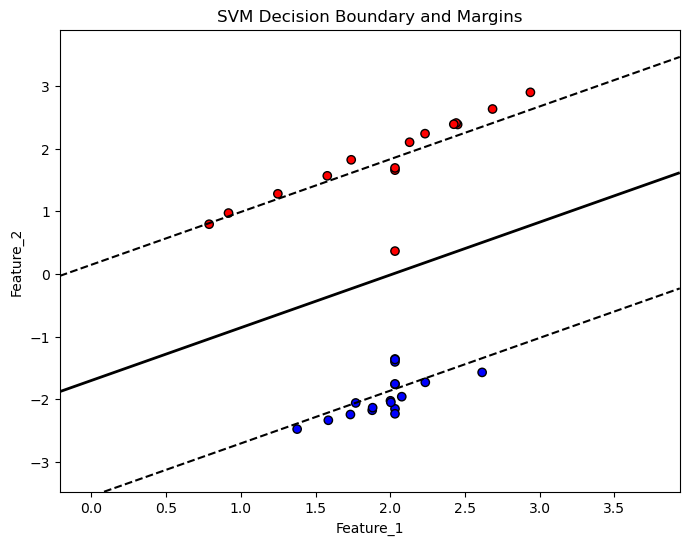

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Support vector machine model
from sklearn.svm import SVC

# Dataset - Make classifications
from sklearn.datasets import make_classification 

np.random.seed(42)

# Generate the Datasets
x,y = make_classification(
    n_samples = 100,
    n_features = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep = 2.0,
    random_state = 42
)

df = pd.DataFrame(x, columns = ['Feature_1', 'Feature_2'])
df['Target'] = y

# Introduce missing data explicitly
n_missing = 10 # 10% missing
missing_indices = np.random.choice(df.index, n_missing, replace = False)

df.loc[missing_indices, 'Feature_1'] = np.nan

print(f'Dataset with the missing values in Feature_1: \n{df.loc[missing_indices]}')

print(f'\nCount of the missing values per column: \n{df.isnull().sum()}')

# Treating Missing data in Feature 1
df['Feature_1'].fillna(df['Feature_1'].mean(), inplace = True)
print(f'\nAfter Treating the missing values per column: \n{df.isnull().sum()}')

# Splitting the data - Training and testing set
x = df[['Feature_1', 'Feature_2']]
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# Creating the model and fit it using SVC and kernel
svm_model = SVC(kernel = 'linear', random_state = 42)
svm_model.fit(x_train, y_train)

# Predicting the model
y_pred = svm_model.predict(x_test)

# Evaluate using accuracy_score, confusion_matrix and classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'\n\nThe accuracy: {accuracy}')
print(f'\nThe Confusion Matrix: \n{conf_mat}')
print(f'\nThe Classification Report: \n{report}')

# Plotting Scatter and Plot
plt.figure(figsize = (8, 6))

# Scatter plot of test points colored by class
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test , cmap='bwr', edgecolors = 'k')
plt.scatter(x_test['Feature_1'], x_test['Feature_2'], c=y_test , cmap='bwr', edgecolors = 'k')

# Define grid boundaries based on test data
# x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
x_min, x_max = x_test['Feature_1'].min() - 1, x_test['Feature_1'].max() + 1
# y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
y_min, y_max = x_test['Feature_2'].min() - 1, x_test['Feature_2'].max() + 1

xx , yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))

# Compute the decision function on the grid
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels = [0], colors = 'k', linewidths = 2) # Hyperplane
plt.contour(xx, yy, Z, levels = [-1, 1], colors = 'k', linestyles = '--') #  Margins (hard and soft margins)

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('SVM Decision Boundary and Margins')
plt.show()